# Simple Gradient Descent

## Fit parameters in a known equation

$$
y = a*sin(x) + b*cos(x)
$$

Create some sample data assuming $a=5$ and $b=2$

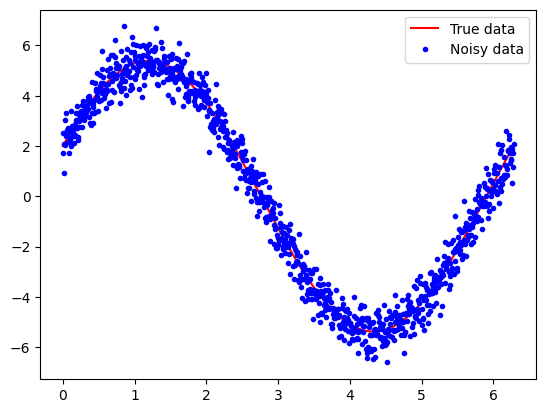

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# params is an array so that we can expand it in the future, it stores a and b

def gen_noisy_data(params, num_points, noise_std):
    x = np.linspace(0, 2 * np.pi, num_points)
    y = params[0] * np.sin(x) + params[1] * np.cos(x)
    noise = np.random.normal(0, noise_std, size=y.shape)
    y_noise = y + noise
    # return the noise free and noisy data
    return pd.DataFrame({'x': x, 'y': y}), \
           pd.DataFrame({'x': x, 'y': y_noise})

true_params = [5, 2] # a, b
num_points = 1000
noise_std = 0.5

df_orig_data, df_noisy_data = gen_noisy_data(true_params, num_points, noise_std)

plt.plot(df_orig_data['x'], df_orig_data['y'], 'r', label='True data')
plt.plot(df_noisy_data['x'], df_noisy_data['y'], 'b.', label='Noisy data')
plt.legend()
plt.show()


We are going to use the noisy dataset as out "training" dataset to find the parameters. We will call this dataset $df_{\text{true}}$ and call the $x$ and $y$ values $x_{\text{true}}$ and $y_{\text{true}}$ respectively.

Since we know the equation ($y = a*sin(x) + b*cos(x)$), the steps to find parameters that fit the equation are quite straightforward:

1. Assume initial parameter values for $a$ and $b$ to be $a_{\text{iter}}$ and $b_{\text{iter}}$

1. For each $x_{\text{true}}$ use the equation with the $a_{\text{iter}}$ and $b_{\text{iter}}$ to calculate the predicted $y$ value $y_{\text{pred}}$

1. For all the datapoints, calculate the difference between $y_{\text{true}}$ and $y_{\text{pred}}$. This difference is going to be modeled as a loss function. More on this later.

1. Based on the loss (difference), we need to update the values of $a_{\text{iter}}$ and $b_{\text{iter}}$ such that we expect the loss to decrease in the next iteration and then loop through steps 2, 3, and 4 till we are happy that the loss between $y_{\text{true}}$ and $y_{\text{pred}}$ is small enough to be acceptable, or that we can't reduce it further becasue of noise in the dataset.

## Loss Function and Gradient Descent

One of the key aspects of the above loop is how we calculate the loss between $y_{\text{true}}$ and $y_{\text{pred}}$ for a given $a_{\text{{iter}}}$ and $a_{\text{{iter}}}$ AND based on this loss, how we updated the parameters for the next iteration such that we believe the loss will decrease in the next iteration.

In order to do this, the method used is called Gradient Descent. 

We pick a loss function:

$$
f_{\text{loss}} = f (x_{\text{true}}, y_{\text{true}}, a, b )
$$

Find the slope loss function with respect to the parameters at the value of the parameters used. This would be the following partial derivatives:

$$
\frac{\partial f_{\text{loss}}}{\partial a} =  f'(x_{\text{true}}, y_{\text{true}}, a_{\text{iter}}, b_{\text{iter}} )
$$

$$
\frac{\partial f_{\text{loss}}}{\partial b} =  f'(x_{\text{true}}, y_{\text{true}}, a_{\text{iter}}, b_{\text{iter}} )
$$

Our goal is to minimize the loss. If we pick a good loss function, one that is convex, upward opening, with a single minima with respect to the parameters, then based on knowing the slope of the function (the partial derivative calculated above) with respect to the parameter at a certain value of the parameter, we can numerically make a small adjustment in the parameter value in the direction of the minima of the loss function for the next iteration.

To define a small step, we use a positive numerical quantity called the learning rate $\lambda$, and here is how we would update the parameters based on the slope of the loss function for the next iteration:

$$
a_{\text{iter}} = a_{\text{iter}} - \lambda \frac{\partial f_{\text{loss}}}{\partial a}
$$

$$
b_{\text{iter}} = b_{\text{iter}} - \lambda \frac{\partial f_{\text{loss}}}{\partial b}
$$


Here is how to think about the sign before $ \lambda $ in the above parameter updates. Note that $ \lambda $ is always a positive number. And the function is convex, upward opening, with a single minima:

- If the slope (derivate) is positive, we would need to reduce the value of the parameter to move towards the minima
- If the slope (derivative) is negative, we would need to increase the value of the parameter to move towards the minima

## Mean Square Error (MSE)

A very common loss function is mean square error. It is the average of the square of the numerical difference between $y_{\text{true}}$ and $y_{\text{pred}}$ for a set of $N$ points. Written as:

$$
MSE = \Sigma(y_{\text{true}}- y_{\text{pred}})^2/N
$$

To find it's slope with respect to a parameter, we would need to substitute the equation for $y_{\text{pred}}$ a such:

$$
MSE = \Sigma[y_{\text{true}} - a*sin(x_{\text{true}}) - b*cos(x_{\text{true}})]^2/N
$$

$$
\frac{\partial MSE}{\partial a} = -(2/N)\Sigma[(y_{\text{true}} - a*sin(x_{\text{true}}) - b*cos(x_{\text{true}}))*sin(x_{\text{true}})]
$$

$$
\frac{\partial MSE}{\partial b} = -(2/N)\Sigma[(y_{\text{true}} - a*sin(x_{\text{true}}) - b*cos(x_{\text{true}}))*cos(x_{\text{true}})]
$$

To simplify these, we can write them in terms of $y_{\text{pred}}$ as such:

$$
\frac{\partial MSE}{\partial a} = -(2/N)\Sigma[(y_{\text{true}} - y_{\text{pred}})*sin(x_{\text{true}})]
$$

$$
\frac{\partial MSE}{\partial b} = -(2/N)\Sigma[(y_{\text{true}} - y_{\text{pred}})*cos(x_{\text{true}})]
$$



## Let's visualize the MSE surface

We are going to visualize the mean square error surface for a bunch of $a$ and $b$ values for our dataset to see if we can visuzlize the global minima of the MSE surface area.

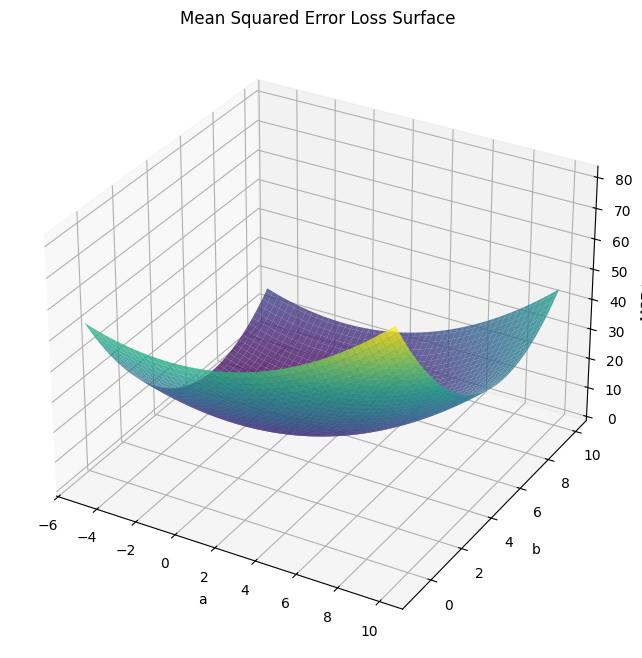

In [2]:
# Let's try and visualize MSE for different values of the parameters

def mse(df_true, params):
    y_pred = params[0] * np.sin(df_true['x']) + params[1] * np.cos(df_true['x'])
    return np.mean((df_true['y'] - y_pred) ** 2)

a_range = np.linspace(-5, 10, 100)
b_range = np.linspace(-1, 10, 100)

mse_values = np.zeros((len(a_range), len(b_range)))

for i, a in enumerate(a_range):
    for j, b in enumerate(b_range):
        mse_values[i, j] = mse(df_noisy_data, [a, b])

A, B = np.meshgrid(a_range, b_range)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(A, B, mse_values, cmap='viridis', alpha=0.8)
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('MSE Loss')
ax.set_title('Mean Squared Error Loss Surface')
plt.show()

## Implement Simple Gradient Descent

For now we'll implement simple gradient descent with all the data in one go and not batch it.

In [3]:
# true_params and the df_noisy_data are already defined

def predict_vals(params, df_true):
    return params[0] * np.sin(df_true['x']) + params[1] * np.cos(df_true['x'])

def calc_loss(params, df_true):
    y_pred = predict_vals(params, df_true)
    return np.mean( (df_true['y'] - y_pred) ** 2 )

def descend(params, df_true, learning_rate):
    y_predict = predict_vals(params, df_true)
    grad_a = np.mean( -2 * (df_true['y'] - y_predict) * np.sin(df_true['x']) )
    grad_b = np.mean( -2 * (df_true['y'] - y_predict) * np.cos(df_true['x']) )

    params[0] -= learning_rate * grad_a
    params[1] -= learning_rate * grad_b

    return params

def train_loop(df_true, init_params,learning_rate, num_epochs):
    # loop through the number of iterations
    iter_params = init_params.copy()
    losses = []
    for i in range(num_epochs):
        # for now use the whole dataframe and find thhe loss
        loss = calc_loss(iter_params, df_true)
        losses.append(loss)
        iter_params = descend(iter_params, df_true, learning_rate)
    return iter_params, losses


Predicted parameters: [4.96915844 2.00191692]


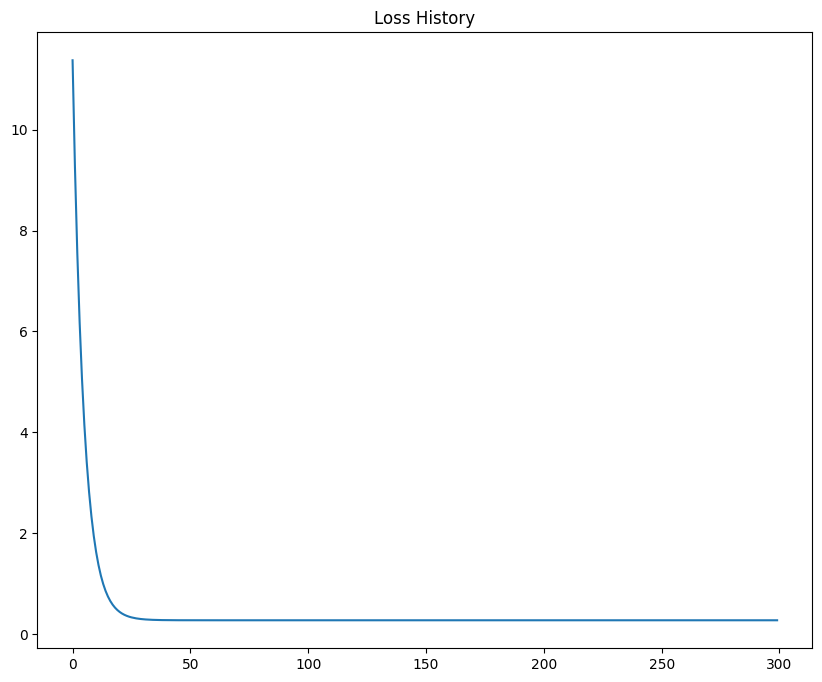

In [4]:
init_params = np.array([0.5, 0.5])
learning_rate = 0.1
num_epochs = 300

pred_params, loss_history = \
    train_loop(df_noisy_data, init_params, learning_rate, num_epochs)

print(f"Predicted parameters: {pred_params}")

plt.figure(figsize=(10, 8))
plt.title('Loss History')
plt.plot(loss_history)
plt.show()

## Machine Learning Style Training Loops

Usually in machine learning style loops a few more things are added to the training loop.

- Separating the data into training and validation sets
- Checking the validation loss during training
- Batching the data into mini-batches

Let's see how to do some of these in the training loop.

In [5]:
from sklearn.model_selection import train_test_split

def train_loop_ml(df_true, init_params,learning_rate, num_epochs, batch_size, val_split):
    # split the data into train and validation dataframes by picking random rows
    # random_state makes sure that we'll get the same split every time
    df_train, df_val = train_test_split(df_true, test_size=val_split, random_state=42)

    # loop through the number of iterations
    iter_params = init_params.copy()
    losses = []
    for ep in range(num_epochs):
        # shuffle the data
        df_shuffled = df_train.sample(frac=1).reset_index(drop=True)

        # loop through the batches
        for i in range(0, len(df_shuffled), batch_size):
            # pick the next batch
            df_batch = df_shuffled.iloc[i:i + batch_size]
            # use gradient descent on the batch
            iter_params = descend(iter_params, df_batch, learning_rate)

        # calculate training loss for the epoch with the updated params
        loss = calc_loss(iter_params, df_shuffled)
        # calculate validation loss for the epoch with the updated params
        val_loss = calc_loss(iter_params, df_val)
        losses.append((loss, val_loss))
    
    df_losses = pd.DataFrame(losses, columns=['train_loss', 'val_loss'])
    return iter_params, df_losses

Predicted parameters: [4.9720714  1.99614853]


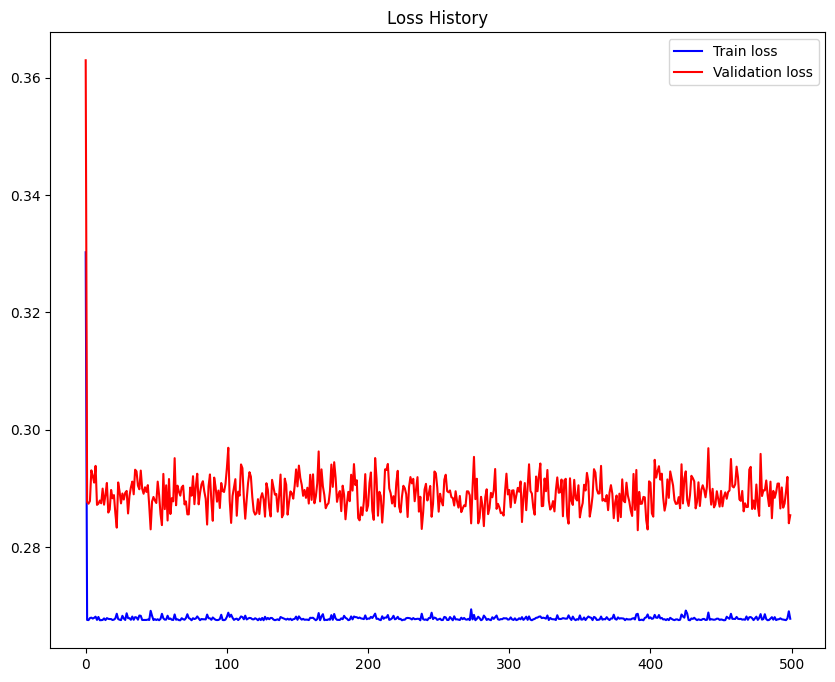

In [7]:
init_params = np.array([0.5, 0.5])
learning_rate = 0.1
num_epochs = 500
batch_size = 32
val_split = 0.2

pred_params, df_loss_history = \
    train_loop_ml(df_noisy_data, init_params, learning_rate, \
                  num_epochs, batch_size, val_split)

print(f"Predicted parameters: {pred_params}")

plt.figure(figsize=(10, 8))
plt.title('Loss History')
plt.plot(df_loss_history['train_loss'], color='b', label='Train loss')
plt.plot(df_loss_history['val_loss'], color='r', label='Validation loss')
plt.legend()
plt.show()

## Normalizing the Data

One other thing that is commonly done is normalizing the data. Normalizing means calculating the mean and standard deviation of the the training data and changing the $x$ and $y$ values of the data as follows:

$$
x_{\text{norm}} = (x - x_{\text{mean}})/x_{\text{std}}
$$

$$
y_{\text{norm}} = (y - y_{\text{mean}})/y_{\text{std}}
$$

I will have to think about what implication this has on the data and how the parameters may change.

### Let's start with a linear equation

In [33]:
# lets start with a linear equation
params = [2, 3]
x = np.linspace(0, 10, 100)
y = params[0] * x + params[1]
noise = np.random.normal(0, 1, size=y.shape)
y_noise = y + noise

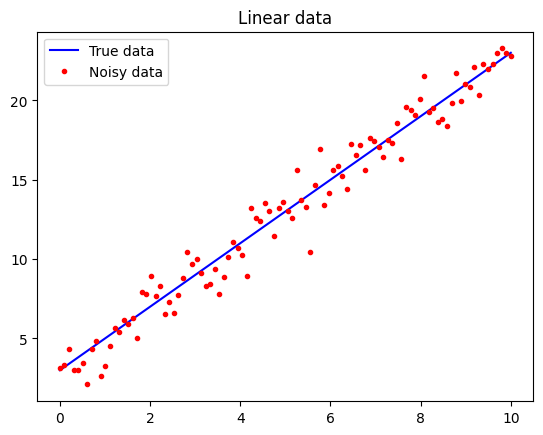

In [34]:
plt.title('Linear data')
plt.plot(x, y, 'b', label='True data')
plt.plot(x, y_noise, 'r.', label='Noisy data', linestyle='None')
plt.legend()
plt.show()

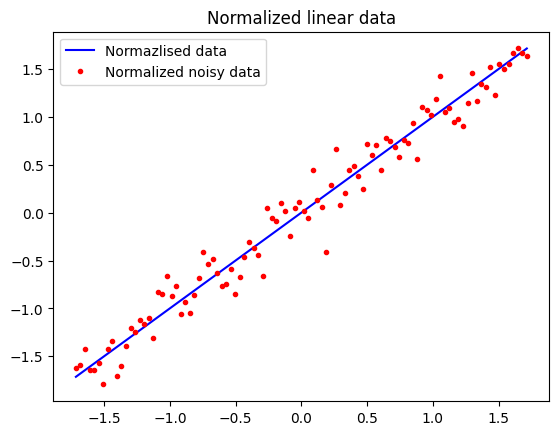

In [35]:
def normalize(data, mean=None, std=None):
    if mean is None:
        mean = data.mean()
    if std is None:
        std = data.std()
    return (data - mean) / std, mean, std

def denormalize(data, mean, std):
    return data * std + mean

x_norm, x_mean, x_std = normalize(x)
y_norm, y_mean, y_std = normalize(y)
y_norm_noisy, y_noisy_mean, y_noisy_std = normalize(y_noise)

plt.title('Normalized linear data')
plt.plot(x_norm, y_norm, 'b', label='Normazlised data')
plt.plot(x_norm, y_norm_noisy, 'r.', label='Normalized noisy data', linestyle='None')
plt.legend()
plt.show()

In [36]:
coeff = np.polyfit(x, y, 1)
print(f"Regular coefficients: {coeff}")

noisy_coeff = np.polyfit(x, y_noise, 1)
print(f"Noisy coefficients: {noisy_coeff}")

# lets try and fit a line
norm_coeff = np.polyfit(x_norm, y_norm, 1)
print(f"Normalized coefficients: {norm_coeff}")

def adjust_params(params, x_mean, x_std, y_mean, y_std):
    a = params[0] * y_std / x_std
    b = params[1] * y_std + y_mean - a * x_mean
    return a, b

print(f"Adjusted normalized coefficients: {adjust_params(norm_coeff, x_mean, x_std, y_mean, y_std)}")


Regular coefficients: [2. 3.]
Noisy coefficients: [2.03526956 2.75178388]
Normalized coefficients: [ 1.000000e+00 -2.875732e-16]
Adjusted normalized coefficients: (1.9999999999999998, 3.0000000000000018)


### What about a trigonometric equation

For a linear equation, you can simply adjust the parameters (coefficients) after doing machine learning on the normalized values of x and y. This is because the linear relationship can be recovered by simply scaling and shifting the parameters.

In the case of a trigonometric equation, this is more complex, because to do the predictions, x_norm has to be adjusted back to the original scale of for the *trigonometric function* to predict the right value. 

Since we will be dealing with linear operations in machine learning, I won't implement the trigonometric case here, but it would look something like this:

When doing the predictions in the loop, adjust $x_{\text{norm}}$ as such when passing in to predict $y$ as such:

$$
y_{\text{norm}} = a_{\text{norm}} \sin(x_{\text{norm}} \cdot x_{\text{std}} + x_{\text{mean}}) + b_{\text{norm}} \cos(x_{\text{norm}} \cdot x_{\text{std}} + x_{\text{mean}})
$$

Once the loop is done and $a_{\text{norm}}$ and $b_{\text{norm}}$ have been predicted, then rescale them as such:

$$
a = a_{\text{norm}}*{y_{\text{std}}} \quad b = b_{\text{norm}}*{y_{\text{std}}} 
$$

## Conclusion

The basic training loop when you know the function is quite simple. You assume values for the parameters and use the function to predict values based on the parameters to calculate the loss. 


## Next Step

The next step is to try and use a neural network to model our function and use the training data to train the neural net. The wanted outcome is that the neural net returns values very similar to the original function through the range it's been trained in.